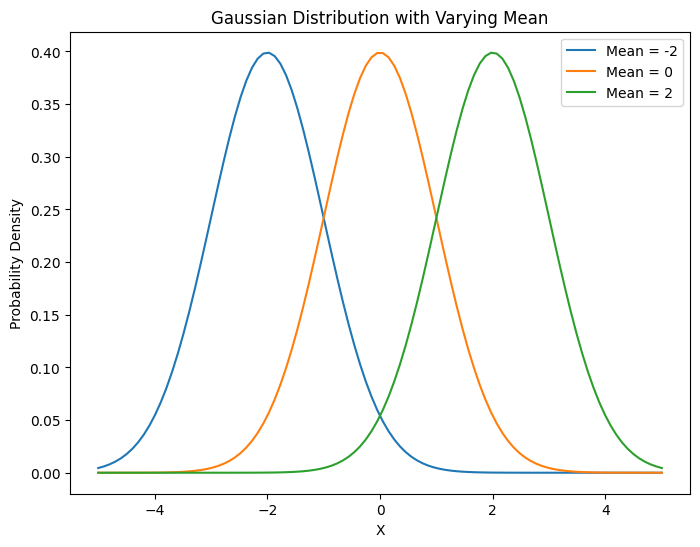

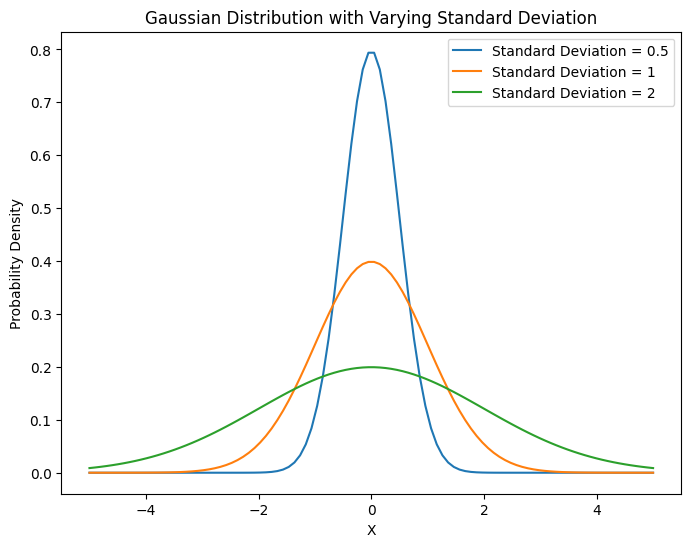

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(x, mu, sigma):
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

x = np.linspace(-5, 5, 100)

# Varying mean
plt.figure(figsize=(8, 6))
for mu in [-2, 0, 2]:
  plt.plot(x, gaussian(x, mu, 1), label=f'Mean = {mu}')
plt.title('Gaussian Distribution with Varying Mean')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Varying variance
plt.figure(figsize=(8, 6))
for sigma in [0.5, 1, 2]:
  plt.plot(x, gaussian(x, 0, sigma), label=f'Standard Deviation = {sigma}')
plt.title('Gaussian Distribution with Varying Standard Deviation')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

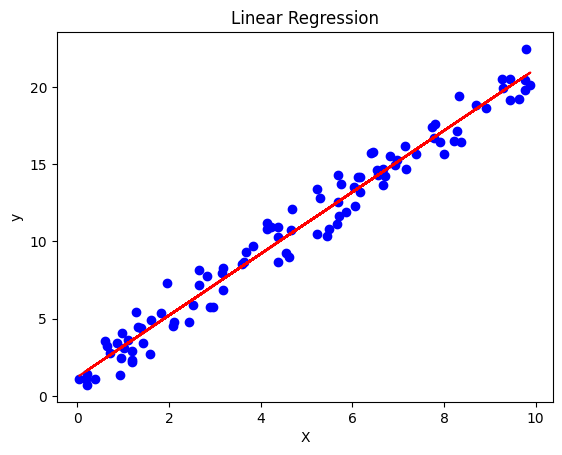

In [ ]:
class LinearRegression:
  def __init__(self):
    self.coefficients = None

  def fit(self, X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept
    self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

  def predict(self, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ self.coefficients

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


Final point after 100 iterations: 2.0370359763344878e-09


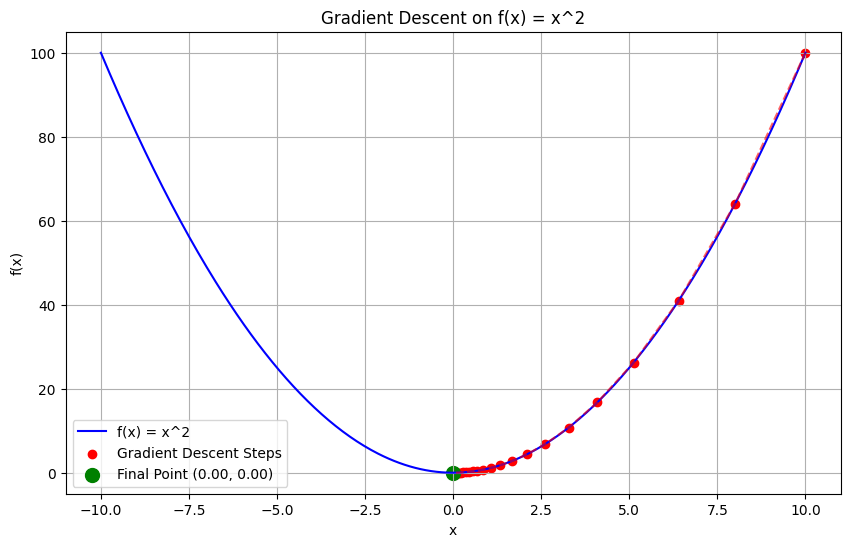

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, initial_point, learning_rate, n_iterations):
    # Initialize the starting point
    point = initial_point

    # Create a list to store the progress
    points = [point]

    for _ in range(n_iterations):
        # Calculate the gradient at the current point
        grad = gradient(point)

        # Update the point using the gradient and learning rate
        point = point - learning_rate * grad

        # Save the new point to the progress list
        points.append(point)

    return point, points

# Example: Minimizing the function f(x) = x^2
# The gradient of f(x) = x^2 is f'(x) = 2x
def gradient(x):
    return 2 * x

# Parameters
initial_point = 10.0  # Starting point
learning_rate = 0.1   # Step size
n_iterations = 100    # Number of iterations

# Run the gradient descent
final_point, points = gradient_descent(gradient, initial_point, learning_rate, n_iterations)

# Output the final point
print(f"Final point after {n_iterations} iterations: {final_point}")

# Plotting the progress of the gradient descent
plt.figure(figsize=(10, 6))

# Plotting f(x) = x^2
x = np.linspace(-initial_point, initial_point, 400)
y = x**2
plt.plot(x, y, label="f(x) = x^2", color="blue")

# Plotting the points visited by gradient descent
points = np.array(points)
plt.scatter(points, points**2, color="red", label="Gradient Descent Steps")
plt.plot(points, points**2, color="red", linestyle="dashed", alpha=0.6)

# Highlighting the final point
plt.scatter(final_point, final_point**2, color="green", s=100, label=f"Final Point ({final_point:.2f}, {final_point**2:.2f})")

# Adding labels and legend
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.2907 - loss: 1.7959 - val_accuracy: 0.4183 - val_loss: 1.3050
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4507 - loss: 1.2849 - val_accuracy: 0.4401 - val_loss: 1.2852
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4608 - loss: 1.2344 - val_accuracy: 0.4482 - val_loss: 1.2672
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4944 - loss: 1.2052 - val_accuracy: 0.4428 - val_loss: 1.2712
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5057 - loss: 1.1729 - val_accuracy: 0.4591 - val_loss: 1.2737
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5282 - loss: 1.1416 - val_accuracy: 0.4714 - val_loss: 1.2395
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5470 - loss: 1.0983 - val_accuracy: 0.4714 - val_loss: 1.2550
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5671 - loss: 1.0701 - val_accuracy: 0.4823 - val_loss: 1.2489


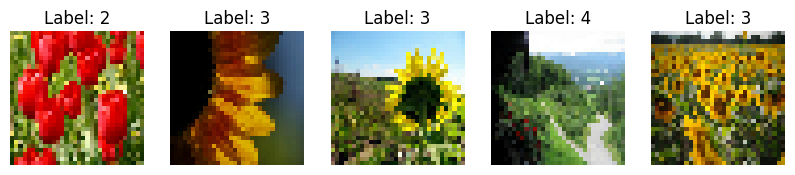

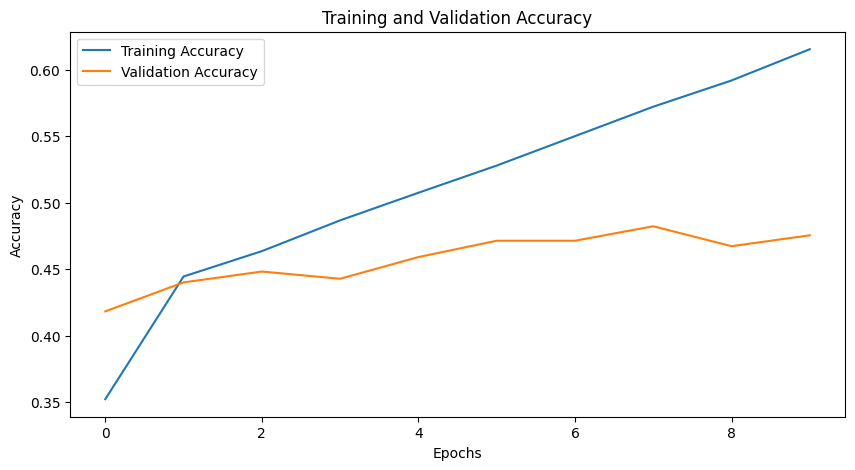

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Flowers dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (32, 32))  # Resize images to 32x32 pixels
    image = image / 255.0  # Normalize the pixel values
    label = tf.one_hot(label, ds_info.features['label'].num_classes)
    return image, label

# Apply preprocessing to the dataset
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Create the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(ds_info.features['label'].num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print('Test accuracy:', accuracy)

# Plot sample images with true labels
def plot_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {tf.argmax(label)}")
        plt.axis('off')
    plt.show()

# Plot some sample images from the training dataset
plot_samples(ds_train.unbatch())

# Plot training & validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuracy of the SVM classifier: 0.73


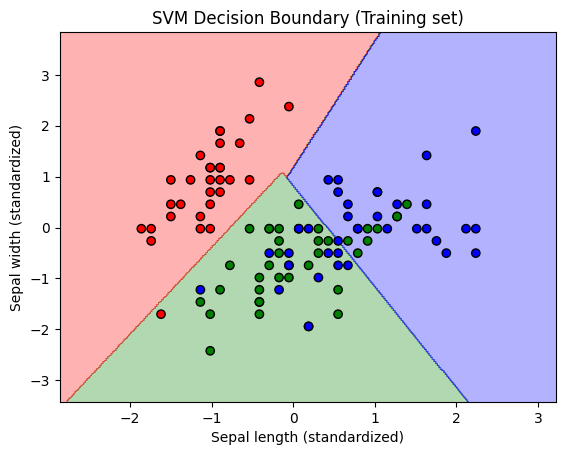

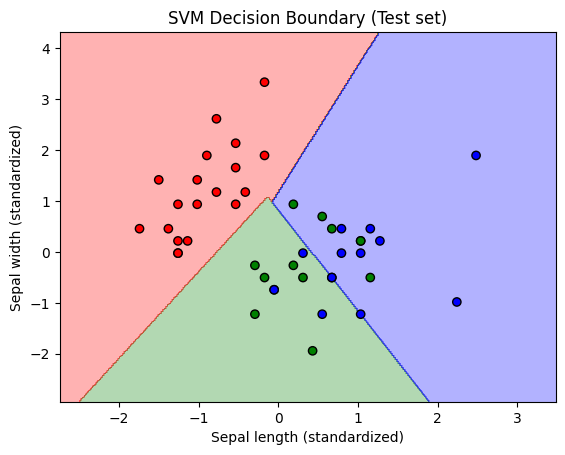

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for 2D visualization (sepal length, sepal width)
y = iris.target  # Labels (0, 1, 2 correspond to different species)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy:.2f}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.show()

# Plot the decision boundary for the training set
plot_decision_boundary(X_train, y_train, svm_classifier, "SVM Decision Boundary (Training set)")

# Plot the decision boundary for the test set
plot_decision_boundary(X_test, y_test, svm_classifier, "SVM Decision Boundary (Test set)")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      37,880,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,979,205 (144.88 MB)

 Trainable params: 37,979,205 (144.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.3249 - loss: 2.3603 - val_accuracy: 0.5409 - val_loss: 1.1003
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.5950 - loss: 1.0382 - val_accuracy: 0.6008 - val_loss: 0.9772
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.6586 - loss: 0.8735 - val_accuracy: 0.6444 - val_loss: 0.9097
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.7506 - loss: 0.6681 - val_accuracy: 0.6322 - val_loss: 0.9833
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.8047 - loss: 0.5423 - val_accuracy: 0.6076 - val_loss: 1.2805
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.8391 - loss: 0.4308 - val_accuracy: 0.6322 - val_loss: 1.3667
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.8765 - loss: 0.3450 - val_accuracy: 0.6403 - val_loss: 1.1741
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9254 - loss: 0.2058 - val_accuracy: 0.6294 - v

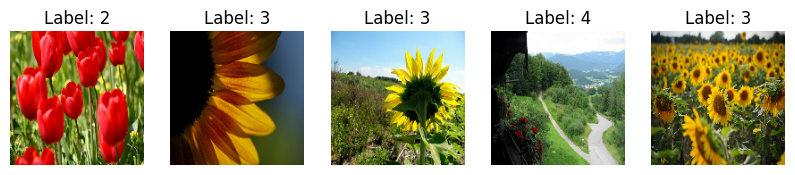

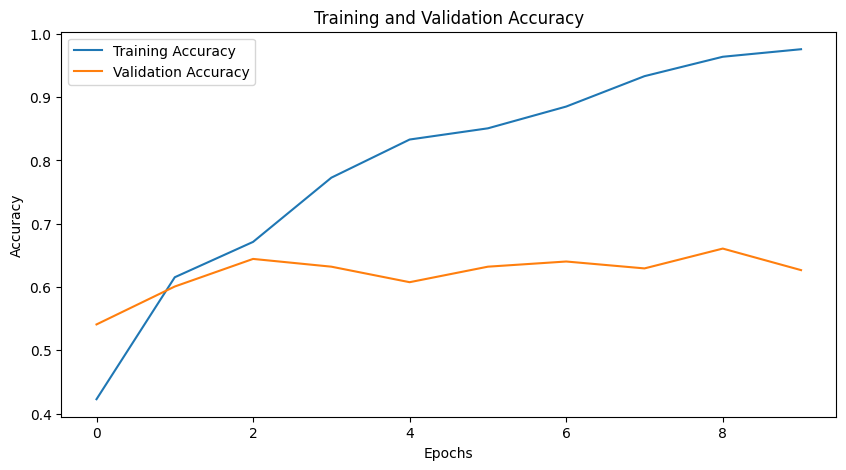

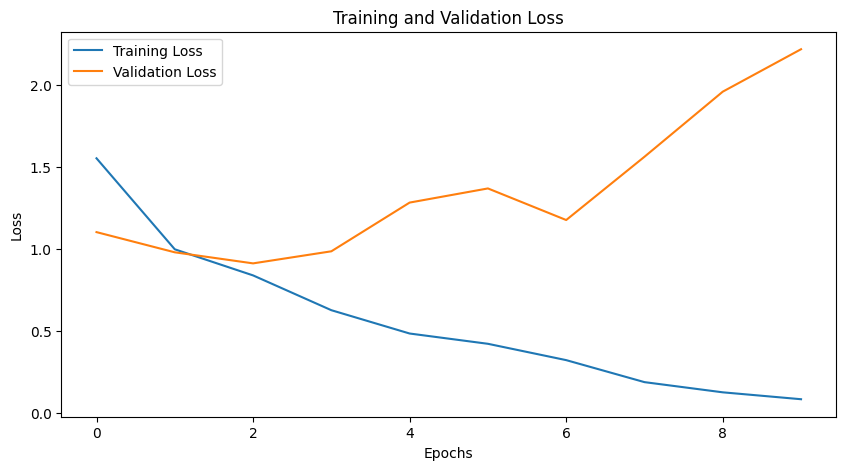

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load the Flowers dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize images to 150x150 pixels
    image = image / 255.0  # Normalize the pixel values
    label = tf.one_hot(label, ds_info.features['label'].num_classes)
    return image, label

# Apply preprocessing to the dataset
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(ds_info.features['label'].num_classes, activation='softmax'))  # 5 flower classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualize the model architecture
model.summary()

# Train the model and capture the training history
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print('Test accuracy:', accuracy)

# Plot sample images with true labels
def plot_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {tf.argmax(label)}")
        plt.axis('off')
    plt.show()

# Plot some sample images from the training dataset
plot_samples(ds_train.unbatch())

# Plot training & validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

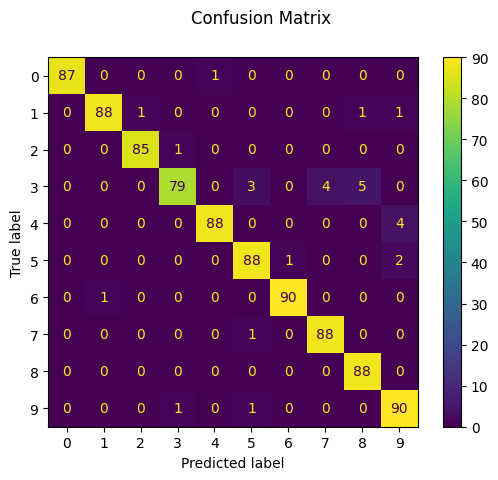

In [ ]:
# prompt: Write a python program to classify different handwritten character images using the SVM classifier.

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
classifier.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.4601 - loss: 1.5363 - val_accuracy: 0.3989 - val_loss: 1.4887
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5118 - loss: 1.3505 - val_accuracy: 0.3989 - val_loss: 1.4834
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4745 - loss: 1.4019 - val_accuracy: 0.3989 - val_loss: 1.4852
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.4874 - loss: 1.3969 - val_accuracy: 0.3989 - val_loss: 1.4968
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4583 - loss: 1.4373 - val_accuracy: 0.3989 - val_loss: 1.5194
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4845 - loss: 1.3812 - val_accuracy: 0.3989 - val_loss: 1.4900
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4805 - loss: 1.3823 - val_accuracy: 0.3989 - val_loss: 1.5012
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.4881 - loss: 1.3861 - val_accuracy: 0.3989 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

     Colin Powell       0.00      0.00      0.00        50
  Donald Rumsfeld       0.00      0.00      0.00        25
    George W Bush       0.46      1.00      0.63       106
Gerhard Schroeder       0.00      0.00      0.00        22
       Tony Blair       0.00      0.00      0.00        25

         accuracy                           0.46       228
        macro avg       0.09      0.20      0.13       228
     weighted avg       0.22      0.46      0.30       228



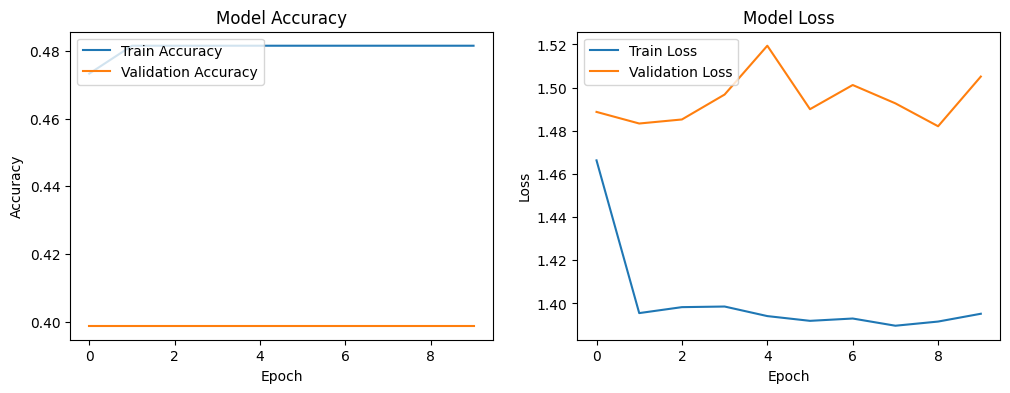

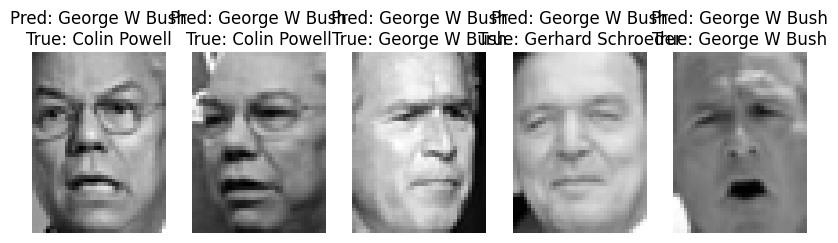

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people

# Load the LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw_people.images  # Face images (grayscale)
y = lfw_people.target  # Labels (people)
target_names = lfw_people.target_names  # Names of people

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Add a channel dimension (since the images are grayscale)
X = X[..., np.newaxis]

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show plots
plt.show()

# Show some sample test images with their predicted and true labels
n_samples = 5
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(X_test[i].reshape(X_test.shape[1], X_test.shape[2]), cmap='gray')
    plt.title(f"Pred: {target_names[y_pred_classes[i]]}\nTrue: {target_names[y_true_classes[i]]}")
    plt.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 343s 16s/step - accuracy: 0.1672 - loss: 1.6110 - val_accuracy: 0.1500 - val_loss: 1.6104
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 370s 16s/step - accuracy: 0.2026 - loss: 1.6076 - val_accuracy: 0.1500 - val_loss: 1.6119
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 320s 16s/step - accuracy: 0.2221 - loss: 1.6060 - val_accuracy: 0.1500 - val_loss: 1.6165
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 319s 16s/step - accuracy: 0.2365 - loss: 1.6051 - val_accuracy: 0.1500 - val_loss: 1.6137
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 323s 16s/step - accuracy: 0.2145 - loss: 1.6062 - val_accuracy: 0.1500 - val_loss: 1.6167
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 323s 16s/step - accuracy: 0.2559 - loss: 1.6021 - val_accuracy: 0.1500 - val_loss: 1.6201
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 320s 16s/step - accuracy: 0.2260 - loss: 1.6092 - val_accuracy: 0.1500 - val_loss: 1.6168
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 327s 16s/step - accuracy: 0.1912 - loss: 1.6137 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        23
           2       0.20      1.00      0.33        20
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        16

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



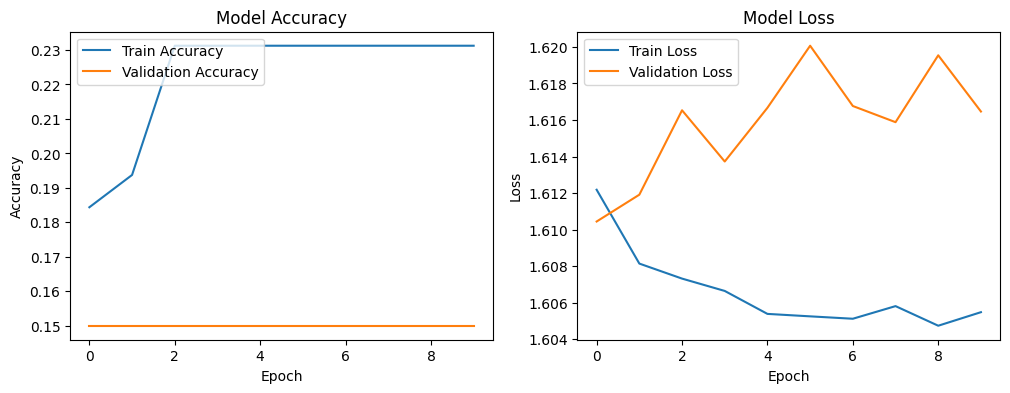

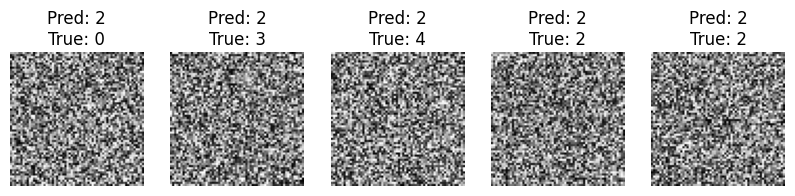

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# Simulate a gait recognition dataset (replace with real data)
# Let's assume X contains sequences of shape (num_sequences, num_frames, height, width, channels)
# and y contains labels for each sequence
num_sequences = 500
num_frames = 30  # Number of frames in each sequence
height, width, channels = 64, 64, 1  # Dimensions of each frame
num_classes = 5  # Number of different people (classes)

# Randomly generate data (replace with actual gait data)
X = np.random.rand(num_sequences, num_frames, height, width, channels)
y = np.random.randint(0, num_classes, num_sequences)

# Normalize pixel values
X = X / 255.0

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CRNN model
model = models.Sequential([
    # TimeDistributed CNN layers to extract features from each frame
    layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=(num_frames, height, width, channels)),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Flatten()),  # Flatten the CNN output

    # LSTM layers to process the sequence of features
    layers.LSTM(128, return_sequences=False),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show plots
plt.show()

# Show some sample test predictions
n_samples = 5
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    # Display the first frame of the sequence
    plt.imshow(X_test[i][0].reshape(height, width), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true_classes[i]}")
    plt.axis('off')

plt.show()


Found 220 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 342s 49s/step - accuracy: 0.5333 - loss: 0.8326 - val_accuracy: 0.6376 - val_loss: 0.6529
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 346s 46s/step - accuracy: 0.8004 - loss: 0.4941 - val_accuracy: 0.6284 - val_loss: 0.6629
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 309s 47s/step - accuracy: 0.8518 - loss: 0.3567 - val_accuracy: 0.5734 - val_loss: 0.7781
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 301s 45s/step - accuracy: 0.8748 - loss: 0.3335 - val_accuracy: 0.6514 - val_loss: 0.6713
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 305s 46s/step - accuracy: 0.8390 - loss: 0.3436 - val_accuracy: 0.5413 - val_loss: 0.9384
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 302s 45s/step - accuracy: 0.9078 - loss: 0.2816 - val_accuracy: 0.6376 - val_loss: 0.7364
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 325s 45s/step - accuracy: 0.9357 - loss: 0.2266 - val_accuracy: 0.6789 - val_loss: 0.6807
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 377s 54s/step - accuracy: 0.9142 - loss: 0.2298 - val_accuracy: 0.6239 - val_loss: 0.7366
Epo

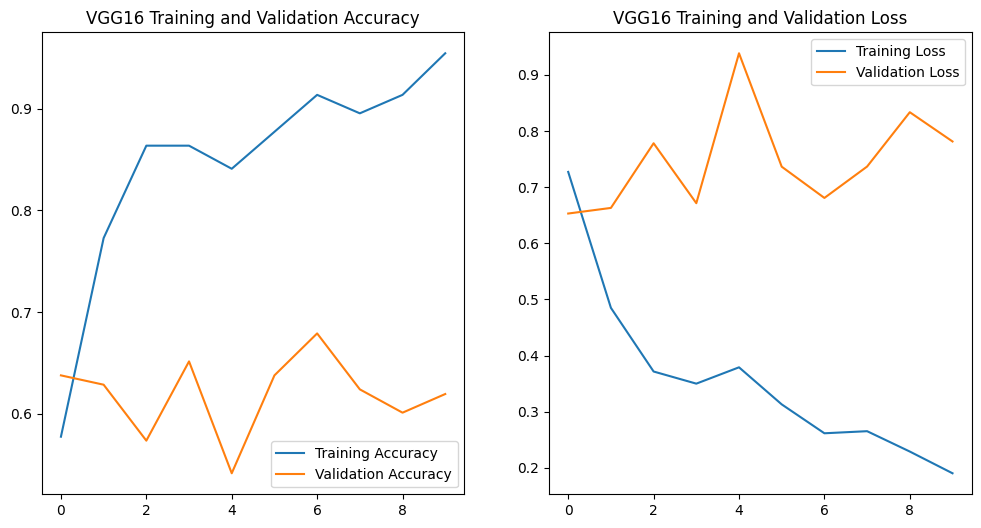

7/7 ━━━━━━━━━━━━━━━━━━━━ 150s 21s/step


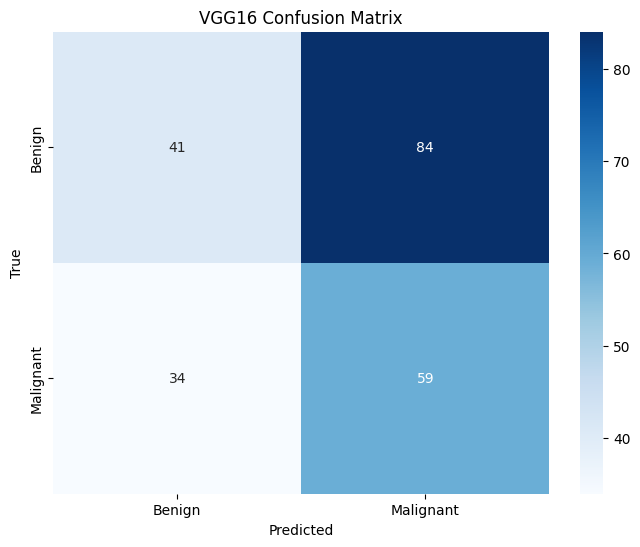

VGG16 Classification Report:
              precision    recall  f1-score   support

      Benign       0.55      0.33      0.41       125
   Malignant       0.41      0.63      0.50        93

    accuracy                           0.46       218
   macro avg       0.48      0.48      0.45       218
weighted avg       0.49      0.46      0.45       218

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 179s 22s/step - accuracy: 0.4952 - loss: 2.4948 - val_accuracy: 0.7385 - val_loss: 0.5352
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 192s 21s/step - accuracy: 0.7708 - loss: 0.4656 - val_accuracy: 0.8303 - val_loss: 0.4463
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 159s 23s/step - accuracy: 0.8786 - loss: 0.3262 - val_accuracy: 0.8165 - val_loss: 0.3862
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 139s 20s/step - accuracy: 0.9295 - loss: 0.1974 - val_accuracy: 0.8349 - val_loss: 0.3829
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 20s/step - accuracy: 0.9250 - loss: 0.2375 - val

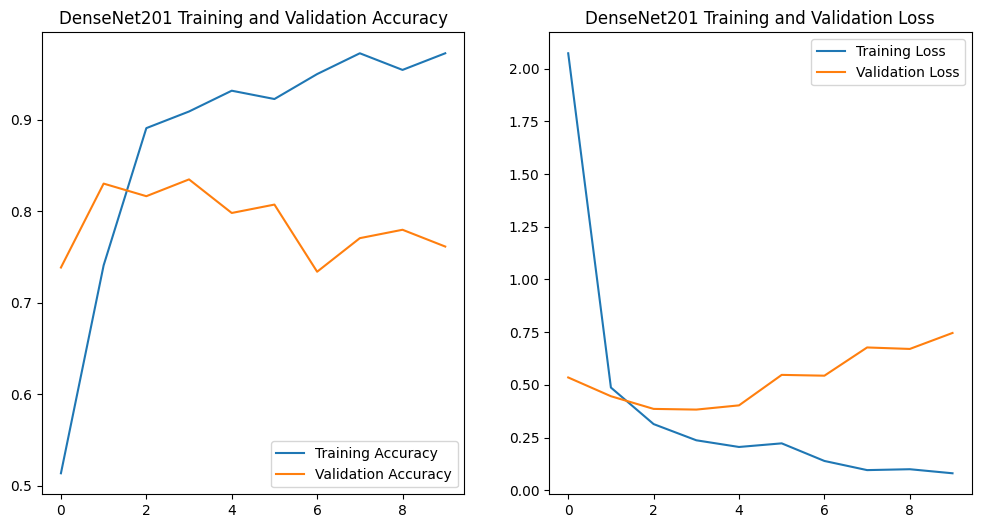

7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step


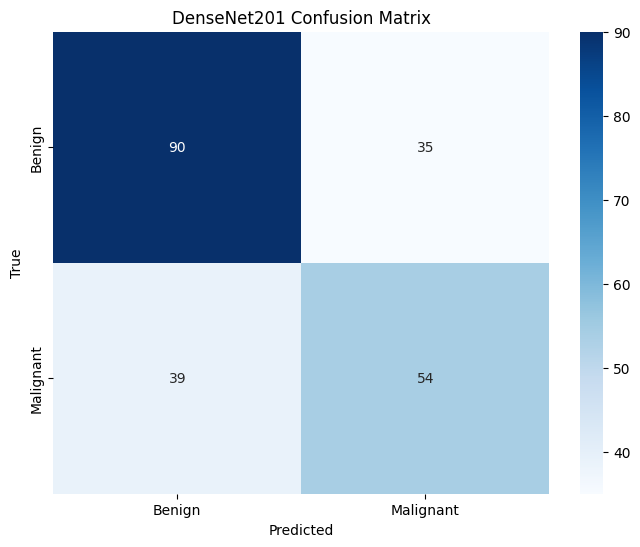

DenseNet201 Classification Report:
              precision    recall  f1-score   support

      Benign       0.70      0.72      0.71       125
   Malignant       0.61      0.58      0.59        93

    accuracy                           0.66       218
   macro avg       0.65      0.65      0.65       218
weighted avg       0.66      0.66      0.66       218



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Paths to the dataset directories (Kaggle BreakHis)
train_dir = '/content/drive/MyDrive/breakhis/train'
validation_dir = '/content/drive/MyDrive/breakhis/validation'
test_dir = '/content/drive/MyDrive/breakhis/test'

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation and normalization for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Model building using VGG16
def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze VGG16 layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Model building using DenseNet201
def build_densenet201_model():
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze DenseNet201 layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Compile and train model
def compile_and_train(model, model_name):
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator)

    return history

# Plotting accuracy and loss curves
def plot_training_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.show()

# Evaluate model on test data and plot confusion matrix
def evaluate_and_plot_confusion_matrix(model, model_name):
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred = np.round(y_pred).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

# Train and evaluate VGG16 model
vgg16_model = build_vgg16_model()
vgg16_history = compile_and_train(vgg16_model, 'VGG16')
plot_training_curves(vgg16_history, 'VGG16')
evaluate_and_plot_confusion_matrix(vgg16_model, 'VGG16')

# Train and evaluate DenseNet201 model
densenet_model = build_densenet201_model()
densenet_history = compile_and_train(densenet_model, 'DenseNet201')
plot_training_curves(densenet_history, 'DenseNet201')
evaluate_and_plot_confusion_matrix(densenet_model, 'DenseNet201')
